In [77]:
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [78]:
traffic1 = pd.read_csv("1분기.csv",encoding='CP949')
traffic2 = pd.read_csv("2분기.csv",encoding='CP949')
traffic3 = pd.read_csv("3분기.csv",encoding='CP949')
traffic4 = pd.read_csv("4분기.csv",encoding='CP949')
dust = pd.read_csv("미세먼지1.csv",header=1,encoding='CP949') #파일불러오기
dust2 = pd.read_csv("초미세먼지.csv",header=1,encoding='CP949')
traffic = pd.concat([traffic1,traffic2,traffic3,traffic4]) #교통량 데이터가 분기별로있어 4개를 합쳐서 1년치데이터로 만듬
traffic.rename(columns = {"영업소명": "도시별"}, inplace = True)

In [79]:
traffic['집계일자'] = np.where(traffic['집계일자'] <20190200,'01월',np.where(traffic['집계일자']<20190300,'02월',np.where(traffic['집계일자']<20190400,'03월',np.where(traffic['집계일자']<20190500,'04월',np.where(traffic['집계일자']<20190600,'05월',np.where(traffic['집계일자']<20190700,'06월',np.where(traffic['집계일자']<20190800,'07월',np.where(traffic['집계일자']<20190900,'08월',np.where(traffic['집계일자']<20191000,'09월',np.where(traffic['집계일자']<20191100,'10월',np.where(traffic['집계일자']<20191200,'11월','12월')))))))))))
#교통량 데이터의 집계일자를 편하게 보기위해 01월,02월식으로 변경

In [80]:
traffic

,집계일자,영업소코드,도시별,입출구구분코드,입출구명,TCS하이패스구분코드,TCS하이패스명,고속도로운영기관구분코드,고속도로운영기관명,영업형태구분코드,영업형태명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
0,01월,246,가락,0,입구,1,TCS,0,한국도로공사,0,폐쇄식,117,0,8,11,19,3,158
1,01월,246,가락,0,입구,2,hi-pass,0,한국도로공사,0,폐쇄식,367,6,3,12,44,12,444
2,01월,29,가락(개),0,입구,1,TCS,0,한국도로공사,1,개방식,2020,28,38,43,132,244,2505
3,01월,29,가락(개),0,입구,2,hi-pass,0,한국도로공사,1,개방식,7422,36,62,40,463,358,8381
4,01월,29,가락(개),1,출구,1,TCS,0,한국도로공사,1,개방식,2575,17,35,41,129,312,3109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129044,12월,532,회인,1,출구,2,hi-pass,0,한국도로공사,0,폐쇄식,532,15,8,9,24,26,614
129045,12월,216,횡성,0,입구,1,TCS,0,한국도로공사,0,폐쇄식,579,20,24,22,3,0,648
129046,12월,216,횡성,0,입구,2,hi-pass,0,한국도로공사,0,폐쇄식,2253,94,74,57,46,128,2652
129047,12월,216,횡성,1,출구,1,TCS,0,한국도로공사,0,폐쇄식,508,15,39,27,4,60,653


In [81]:
traffic.drop(columns=['영업소코드','입출구구분코드','입출구명','TCS하이패스구분코드','TCS하이패스명','고속도로운영기관구분코드','고속도로운영기관명','영업형태구분코드','영업형태명'],axis=1,inplace=True)
#쓸모없는 데이터 열 삭제

In [82]:
seoul =np.array(['동서울','서서울','서울'])
incheon = np.array(['인천','동인천','양촌'])
daejeon = np.array(['대전','서대전','유성','신탄진','안영','북대전','판암','남대전'])
daegu =  np.array(['대구','서대구','북대구','남대구','북현풍','팔공산','유천','칠곡','달성']) 
busan = np.array(['부산','북부산','서부산','기장일광','가락','기장철마','노포','금정','기장동','기장서'])
ulsan = np.array(['서울산','통도사','활천','범서'])
#sejong = np.array(['남세종','서세종'])
gwangju = np.array(['동광산','동광주','서광산','광주'])
tolgate = np.concatenate([seoul,incheon,daejeon,daegu,busan,ulsan,gwangju])
# 톨게이트명이 굉장히 다양하여 
# 각 지역별 있는 톨게이트를 만들고 모든 톨게이트합침

In [83]:
traffic = traffic[traffic['도시별'].isin(tolgate)]
traffic
#교통량데이터에서 톨게이트에 있는 데이터만 남김

,집계일자,도시별,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
0,01월,가락,117,0,8,11,19,3,158
1,01월,가락,367,6,3,12,44,12,444
96,01월,광주,3828,28,63,86,23,21,4049
97,01월,광주,14785,178,793,200,112,335,16403
98,01월,광주,3681,40,66,103,20,232,4142
...,...,...,...,...,...,...,...,...,...
128951,12월,팔공산,10110,302,191,84,203,418,11308
129029,12월,활천,190,11,70,55,31,4,361
129030,12월,활천,1004,80,70,63,256,33,1506
129031,12월,활천,271,19,57,88,29,24,488


In [84]:
traffic['도시별'] = np.where(traffic['도시별'].isin(seoul),'서울',np.where(traffic['도시별'].isin(busan),'부산',np.where(traffic['도시별'].isin(gwangju),'광주',np.where(traffic['도시별'].isin(daejeon),'대전',np.where(traffic['도시별'].isin(daegu),'대구',np.where(traffic['도시별'].isin(ulsan),'울산','인천'))))))
# 각 지역별 톨게이트들의 이름을 보기 편하게 각 지역명으로 바꿈

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
traffic

,집계일자,도시별,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
0,01월,부산,117,0,8,11,19,3,158
1,01월,부산,367,6,3,12,44,12,444
96,01월,광주,3828,28,63,86,23,21,4049
97,01월,광주,14785,178,793,200,112,335,16403
98,01월,광주,3681,40,66,103,20,232,4142
...,...,...,...,...,...,...,...,...,...
128951,12월,대구,10110,302,191,84,203,418,11308
129029,12월,울산,190,11,70,55,31,4,361
129030,12월,울산,1004,80,70,63,256,33,1506
129031,12월,울산,271,19,57,88,29,24,488


In [86]:
traffic= traffic.groupby(by=['집계일자','도시별']).sum()
#정리한 데이터를 집계일자와 도시별로 groupby

In [87]:
traffic

1종교통량   2종교통량   3종교통량   4종교통량   5종교통량   6종교통량      총교통량
집계일자 도시별                                                            
01월  광주    3348538   90334  182199  116505  121987  104276   3963839
     대구    7198981  237013  280423  141990  409736  545472   8813615
     대전    5883343  162646  232905  169270  162396  314951   6925511
     부산    6033761  151695  223032  118426  244723  351102   7122739
     서울   13041636  473134  910488  415022  325758  666245  15832283
...            ...     ...     ...     ...     ...     ...       ...
12월  대전    6288019  162902  237266  163741  158575  324554   7335057
     부산    6432858  149475  226505  126470  251082  373346   7559736
     서울   13275395  456164  895448  405000  301789  651386  15985182
     울산     927507   40870   62656   43015   68602   45303   1187953
     인천    4113974  106766   72440   65799  148565  330664   4838208

[84 rows x 7 columns]

In [88]:
dust= dust.iloc[:,:-1]
dust

,시도별,도시별,2019년01월,2019년02월,2019년03월,2019년04월,2019년05월,2019년06월,2019년07월,2019년08월,2019년09월,2019년10월,2019년11월,2019년12월
0,총계,NaN,60,56,62.0,42,50.0,33,27,28,25.0,32,41,39
1,서울,서울,66,57,69.0,41,52.0,29,26,25,21.0,31,40,42
2,부산,부산,48,48,51.0,40,47.0,32,26,30,24.0,27,35,35
3,대구,대구,57,54,54.0,40,46.0,32,26,26,23.0,27,41,42
4,인천,인천,62,55,67.0,43,51.0,29,31,30,28.0,35,41,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,$경남,합천,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,26
160,도평균,49,51,51,40.0,47,36.0,29,32,27,30.0,37,33,NaN
161,제주$제주,제주,39,46,56.0,43,47.0,34,27,30,28.0,34,44,33
162,$제주,서귀포,32,38,47.0,35,40.0,28,24,30,23.0,31,38,27


In [89]:
dust = dust.dropna().head(8) #미세먼지 데이터 상위 8개만 보이도록 함 

In [90]:
dust = dust.drop(columns=['시도별']) # 시도별 과 도시별 열이 중복되어 하나 삭제

In [91]:
dust = dust.sort_values(by='도시별') # 교통량 데이터와 일치시키기위해 도시별을 정렬
dust = dust.drop(dust.index[5]) #세종 삭제
dust

,도시별,2019년01월,2019년02월,2019년03월,2019년04월,2019년05월,2019년06월,2019년07월,2019년08월,2019년09월,2019년10월,2019년11월,2019년12월
5,광주,53,57,63.0,43,50.0,40,29,31,27.0,35,43,33
3,대구,57,54,54.0,40,46.0,32,26,26,23.0,27,41,42
6,대전,66,62,68.0,40,46.0,30,23,25,22.0,29,43,40
2,부산,48,48,51.0,40,47.0,32,26,30,24.0,27,35,35
1,서울,66,57,69.0,41,52.0,29,26,25,21.0,31,40,42
7,울산,45,46,49.0,40,49.0,34,29,30,25.0,27,34,33
4,인천,62,55,67.0,43,51.0,29,31,30,28.0,35,41,40


In [18]:
e = pd.concat([dust.iloc[:,1],dust.iloc[:,2],dust.iloc[:,3],dust.iloc[:,4],dust.iloc[:,5],dust.iloc[:,6],dust.iloc[:,7],dust.iloc[:,8],dust.iloc[:,9],dust.iloc[:,10],dust.iloc[:,11],dust.iloc[:,12]],axis=0)
e = e.to_numpy().astype(float)
len(e)
# 매 월 미세먼지 농도를 도시별로 나열

84

In [19]:
traffic['미세먼지']= e 
# 교통량 데이터에 미세먼지열을 추가한 후 위에서 구한 미세먼지 농도를 데이터삽입

In [20]:
traffic

1종교통량   2종교통량   3종교통량   4종교통량   5종교통량   6종교통량      총교통량  미세먼지
집계일자 도시별                                                                  
01월  광주    3348538   90334  182199  116505  121987  104276   3963839  53.0
     대구    7198981  237013  280423  141990  409736  545472   8813615  57.0
     대전    5883343  162646  232905  169270  162396  314951   6925511  66.0
     부산    6033761  151695  223032  118426  244723  351102   7122739  48.0
     서울   13041636  473134  910488  415022  325758  666245  15832283  66.0
...            ...     ...     ...     ...     ...     ...       ...   ...
12월  대전    6288019  162902  237266  163741  158575  324554   7335057  40.0
     부산    6432858  149475  226505  126470  251082  373346   7559736  35.0
     서울   13275395  456164  895448  405000  301789  651386  15985182  42.0
     울산     927507   40870   62656   43015   68602   45303   1187953  33.0
     인천    4113974  106766   72440   65799  148565  330664   4838208  40.0

[84 rows x 8 columns]

In [21]:
dust2 = dust2.iloc[:,:-1]
dust2 = dust2.dropna().head(8)
dust2 = dust2.drop(columns=['시도별'])
dust2 = dust2.sort_values(by='도시별')
dust2 = dust2.drop(dust2.index[5])
dust2 #위와 동일하게 초미세먼지 데이터 정리

,도시별,2019년01월,2019년02월,2019년03월,2019년04월,2019년05월,2019년06월,2019년07월,2019년08월,2019년09월,2019년10월,2019년11월,2019년12월
5,광주,33,34,39.0,20,22.0,25,17,17,15,18,20,22
3,대구,33,33,33.0,19,23.0,20,16,16,13,14,21,29
6,대전,34,36,39.0,16,22.0,18,14,15,12,15,21,25
2,부산,29,28,30.0,20,25.0,21,18,19,13,13,17,23
1,서울,38,35,45.0,21,29.0,20,19,16,12,15,20,28
7,울산,26,26,29.0,19,26.0,22,19,18,13,11,15,20
4,인천,33,31,41.0,20,26.0,17,19,18,14,16,19,25


In [22]:
e1 = pd.concat([dust2.iloc[:,1],dust2.iloc[:,2],dust2.iloc[:,3],dust2.iloc[:,4],dust2.iloc[:,5],dust2.iloc[:,6],dust2.iloc[:,7],dust2.iloc[:,8],dust2.iloc[:,9],dust2.iloc[:,10],dust2.iloc[:,11],dust2.iloc[:,12]],axis=0)
e1 = e1.to_numpy().astype(float)

In [23]:
traffic['초미세먼지']= e1
traffic

1종교통량   2종교통량   3종교통량   4종교통량   5종교통량   6종교통량      총교통량  미세먼지  \
집계일자 도시별                                                                     
01월  광주    3348538   90334  182199  116505  121987  104276   3963839  53.0   
     대구    7198981  237013  280423  141990  409736  545472   8813615  57.0   
     대전    5883343  162646  232905  169270  162396  314951   6925511  66.0   
     부산    6033761  151695  223032  118426  244723  351102   7122739  48.0   
     서울   13041636  473134  910488  415022  325758  666245  15832283  66.0   
...            ...     ...     ...     ...     ...     ...       ...   ...   
12월  대전    6288019  162902  237266  163741  158575  324554   7335057  40.0   
     부산    6432858  149475  226505  126470  251082  373346   7559736  35.0   
     서울   13275395  456164  895448  405000  301789  651386  15985182  42.0   
     울산     927507   40870   62656   43015   68602   45303   1187953  33.0   
     인천    4113974  106766   72440   65799  148565  330664   4838208  40.0   

          초미세먼지  
집계일자 도시별         
01월  광주    33.0  
     대구    33.0  
     대전    34.0  
     부산    29.0  
     서울    38.0  
...         ...  
12월  대전    25.0  
     부산    23.0  
     서울    28.0  
     울산    20.0  
     인천    25.0  

[84 rows x 9 columns]

In [24]:
traffic.reset_index(inplace=True)
traffic # 미세먼지와 초미세먼지 합친 데이터

,집계일자,도시별,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,미세먼지,초미세먼지
0,01월,광주,3348538,90334,182199,116505,121987,104276,3963839,53.0,33.0
1,01월,대구,7198981,237013,280423,141990,409736,545472,8813615,57.0,33.0
2,01월,대전,5883343,162646,232905,169270,162396,314951,6925511,66.0,34.0
3,01월,부산,6033761,151695,223032,118426,244723,351102,7122739,48.0,29.0
4,01월,서울,13041636,473134,910488,415022,325758,666245,15832283,66.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...
79,12월,대전,6288019,162902,237266,163741,158575,324554,7335057,40.0,25.0
80,12월,부산,6432858,149475,226505,126470,251082,373346,7559736,35.0,23.0
81,12월,서울,13275395,456164,895448,405000,301789,651386,15985182,42.0,28.0
82,12월,울산,927507,40870,62656,43015,68602,45303,1187953,33.0,20.0


In [25]:
traffic.corr() # 교통량과 (초)미세먼지의 상관관계 나타냄

,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,미세먼지,초미세먼지
1종교통량,1.000000,0.979758,0.938554,0.941112,0.557311,0.943329,0.998749,0.015678,0.084193
2종교통량,0.979758,1.000000,0.968434,0.962249,0.546000,0.916362,0.983293,0.033626,0.097832
3종교통량,0.938554,0.968434,1.000000,0.990316,0.537860,0.838789,0.947340,0.035813,0.099375
4종교통량,0.941112,0.962249,0.990316,1.000000,0.554686,0.844902,0.949924,0.054206,0.115202
5종교통량,0.557311,0.546000,0.537860,0.554686,1.000000,0.552724,0.589625,0.235548,0.312928
6종교통량,0.943329,0.916362,0.838789,0.844902,0.552724,1.000000,0.943784,0.054772,0.108727
총교통량,0.998749,0.983293,0.947340,0.949924,0.589625,0.943784,1.000000,0.030032,0.099527
미세먼지,0.015678,0.033626,0.035813,0.054206,0.235548,0.054772,0.030032,1.000000,0.935643
초미세먼지,0.084193,0.097832,0.099375,0.115202,0.312928,0.108727,0.099527,0.935643,1.000000


Text(0.5, 1.0, '교통량과 (초)미세먼지 상관관계')

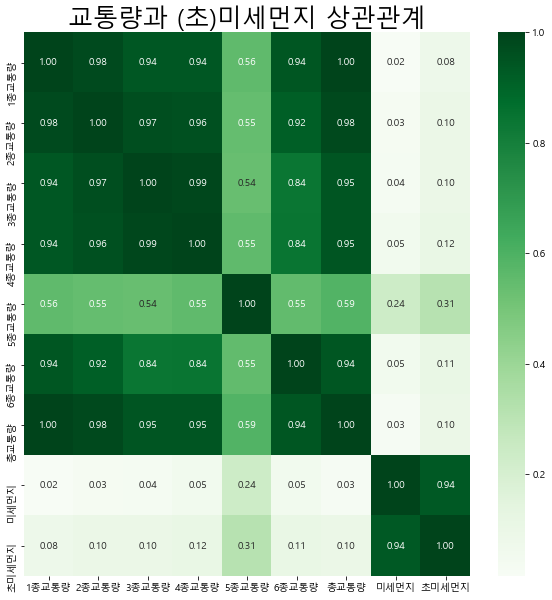

In [26]:
plt.figure(figsize=(10,10))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.heatmap(data = traffic.corr(),annot=True,fmt='.2f',cmap='Greens')
plt.title('교통량과 (초)미세먼지 상관관계',fontsize=25)

In [27]:
weather = pd.read_csv("날씨.csv",encoding='CP949')
place = traffic['도시별'].drop_duplicates() # 날씨데이터에서 필요한 도시들만 추출하기위해 사용
weather = weather[weather['지점명'].isin(place)] # 위에서구한 도시들만 있는 날시데이터 추출
del weather['지점'] #쓸모없는데이터 삭제
weather['일시']=weather['일시'].str.split('-').str[1] 
weather = weather.rename(columns={'지점명' : '도시별'})
weather.fillna(0,inplace=True) #강수량이 없으면 강수량데이터가 비워져있어 0으로 채움
weather = weather.filter(['도시별','일시','기온(°C)','강수량(mm)','습도(%)']) # 필요한 데이터만 추출
weather

,도시별,일시,기온(°C),강수량(mm),습도(%)
8736,서울,01,-5.9,0.0,56.0
8737,서울,01,-6.5,0.0,60.0
8738,서울,01,-6.9,0.0,62.0
8739,서울,01,-7.2,0.0,57.0
8740,서울,01,-7.6,0.0,59.0
...,...,...,...,...,...
69883,부산,12,9.6,0.0,74.0
69884,부산,12,9.5,0.0,70.0
69885,부산,12,9.3,0.0,70.0
69886,부산,12,8.7,0.0,69.0


In [28]:
a = weather.groupby(['일시','도시별']).mean()

In [29]:
a

기온(°C)   강수량(mm)      습도(%)
일시 도시별                               
01 광주   1.773620  0.022073  59.040377
   대구   1.706864  0.012786  43.573351
   대전   0.068506  0.002288  59.406460
   부산   4.483849  0.017093  39.043069
   서울  -0.877120  0.000000  45.763122
...          ...       ...        ...
12 대전   2.826214  0.037448  69.861304
   부산   7.263107  0.069764  50.758669
   서울   1.744105  0.031345  58.195562
   울산   5.594591  0.056588  55.174757
   인천   2.337587  0.034674  62.823856

[84 rows x 3 columns]

In [30]:
h1 = a.iloc[:,0]
h1 = h1.to_numpy().astype(float)
traffic['기온'] = h1
h2 = a.iloc[:,1]
h2 = h2.to_numpy().astype(float)
traffic['강수량'] = h2
h3 = a.iloc[:,2]
h3 = h3.to_numpy().astype(float)
traffic['습도'] = h3
traffic #기온,강수량,습도를 원래 데이터에 합침

,집계일자,도시별,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,미세먼지,초미세먼지,기온,강수량,습도
0,01월,광주,3348538,90334,182199,116505,121987,104276,3963839,53.0,33.0,1.773620,0.022073,59.040377
1,01월,대구,7198981,237013,280423,141990,409736,545472,8813615,57.0,33.0,1.706864,0.012786,43.573351
2,01월,대전,5883343,162646,232905,169270,162396,314951,6925511,66.0,34.0,0.068506,0.002288,59.406460
3,01월,부산,6033761,151695,223032,118426,244723,351102,7122739,48.0,29.0,4.483849,0.017093,39.043069
4,01월,서울,13041636,473134,910488,415022,325758,666245,15832283,66.0,38.0,-0.877120,0.000000,45.763122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,12월,대전,6288019,162902,237266,163741,158575,324554,7335057,40.0,25.0,2.826214,0.037448,69.861304
80,12월,부산,6432858,149475,226505,126470,251082,373346,7559736,35.0,23.0,7.263107,0.069764,50.758669
81,12월,서울,13275395,456164,895448,405000,301789,651386,15985182,42.0,28.0,1.744105,0.031345,58.195562
82,12월,울산,927507,40870,62656,43015,68602,45303,1187953,33.0,20.0,5.594591,0.056588,55.174757


In [ ]:
traffic.corr() # 교통량, 날씨와 미세먼지간의 상관관계

In [ ]:
plt.figure(figsize=(10,10))
#plt.rcParams['font.family'] = 'Malgun Gothic'
sns.heatmap(data = traffic.corr(),annot=True,fmt='.2f',cmap='Blues')

In [32]:
traffic1 = traffic.filter(['집계일자','도시별','기온','강수량','습도','미세먼지','초미세먼지'])
traffic1 #상관관계가 없는 1~4종 교통량을 버리고 의미있는 데이터만 추출

,집계일자,도시별,기온,강수량,습도,미세먼지,초미세먼지
0,01월,광주,1.773620,0.022073,59.040377,53.0,33.0
1,01월,대구,1.706864,0.012786,43.573351,57.0,33.0
2,01월,대전,0.068506,0.002288,59.406460,66.0,34.0
3,01월,부산,4.483849,0.017093,39.043069,48.0,29.0
4,01월,서울,-0.877120,0.000000,45.763122,66.0,38.0
...,...,...,...,...,...,...,...
79,12월,대전,2.826214,0.037448,69.861304,40.0,25.0
80,12월,부산,7.263107,0.069764,50.758669,35.0,23.0
81,12월,서울,1.744105,0.031345,58.195562,42.0,28.0
82,12월,울산,5.594591,0.056588,55.174757,33.0,20.0


C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


Text(0.5, 1.0, '날씨와 (초)미세먼지 상관관계')

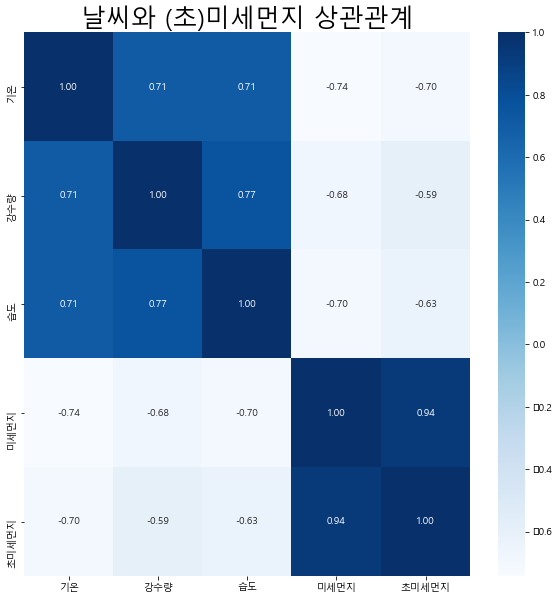

In [33]:
plt.figure(figsize=(10,10))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.heatmap(data = traffic1.corr(),annot=True,fmt='.2f',cmap='Blues')
plt.title('날씨와 (초)미세먼지 상관관계',fontsize=25)

<AxesSubplot:xlabel='집계일자', ylabel='미세먼지'>

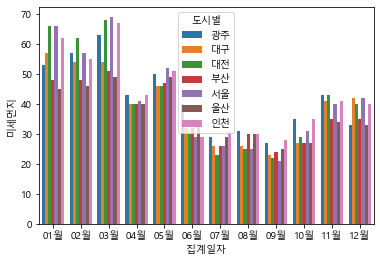

In [34]:
sns.barplot(data=traffic,x='집계일자',y='미세먼지',hue='도시별')

<AxesSubplot:xlabel='집계일자', ylabel='미세먼지'>

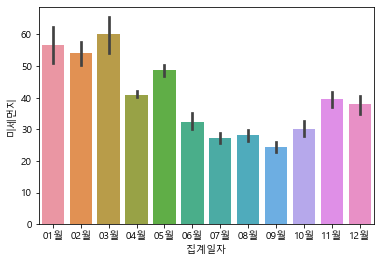

In [35]:
sns.barplot(data=traffic,x='집계일자',y='미세먼지')

<AxesSubplot:xlabel='집계일자', ylabel='초미세먼지'>

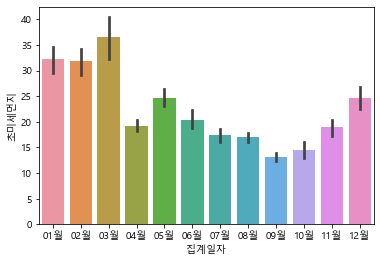

In [36]:
sns.barplot(data=traffic,x='집계일자',y='초미세먼지')

In [37]:
traffic

,집계일자,도시별,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,미세먼지,초미세먼지,기온,강수량,습도
0,01월,광주,3348538,90334,182199,116505,121987,104276,3963839,53.0,33.0,1.773620,0.022073,59.040377
1,01월,대구,7198981,237013,280423,141990,409736,545472,8813615,57.0,33.0,1.706864,0.012786,43.573351
2,01월,대전,5883343,162646,232905,169270,162396,314951,6925511,66.0,34.0,0.068506,0.002288,59.406460
3,01월,부산,6033761,151695,223032,118426,244723,351102,7122739,48.0,29.0,4.483849,0.017093,39.043069
4,01월,서울,13041636,473134,910488,415022,325758,666245,15832283,66.0,38.0,-0.877120,0.000000,45.763122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,12월,대전,6288019,162902,237266,163741,158575,324554,7335057,40.0,25.0,2.826214,0.037448,69.861304
80,12월,부산,6432858,149475,226505,126470,251082,373346,7559736,35.0,23.0,7.263107,0.069764,50.758669
81,12월,서울,13275395,456164,895448,405000,301789,651386,15985182,42.0,28.0,1.744105,0.031345,58.195562
82,12월,울산,927507,40870,62656,43015,68602,45303,1187953,33.0,20.0,5.594591,0.056588,55.174757


In [38]:
traffic['미세먼지수치']=np.where(traffic['미세먼지'] <= 30,'좋음',np.where(traffic['미세먼지'] <= 50,'보통','나쁨' ))
# WHO의 기준에 따라 미세먼지 수치에따른 분류

In [39]:
traffic['미세먼지수치'].values 

array(['나쁨', '나쁨', '나쁨', '보통', '나쁨', '보통', '나쁨', '나쁨', '나쁨', '나쁨', '보통',
       '나쁨', '보통', '나쁨', '나쁨', '나쁨', '나쁨', '나쁨', '나쁨', '보통', '나쁨', '보통',
       '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '나쁨',
       '보통', '나쁨', '보통', '보통', '좋음', '보통', '좋음', '보통', '좋음', '좋음', '좋음',
       '좋음', '좋음', '좋음', '좋음', '보통', '보통', '좋음', '좋음', '좋음', '좋음', '좋음',
       '좋음', '좋음', '좋음', '좋음', '좋음', '좋음', '좋음', '좋음', '보통', '좋음', '좋음',
       '좋음', '보통', '좋음', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통',
       '보통', '보통', '보통', '보통', '보통', '보통', '보통'], dtype=object)

In [40]:
traffic['초미세먼지수치']=np.where(traffic['초미세먼지'] <= 15,'좋음',np.where(traffic['초미세먼지'] <= 25,'보통','나쁨' ))

In [41]:
traffic['초미세먼지수치'].values # WHO의 기준에 따라 초미세먼지 수치에따른 분류

array(['나쁨', '나쁨', '나쁨', '나쁨', '나쁨', '나쁨', '나쁨', '나쁨', '나쁨', '나쁨', '나쁨',
       '나쁨', '나쁨', '나쁨', '나쁨', '나쁨', '나쁨', '나쁨', '나쁨', '나쁨', '나쁨', '보통',
       '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '나쁨',
       '나쁨', '나쁨', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통',
       '좋음', '보통', '보통', '보통', '보통', '보통', '보통', '좋음', '보통', '보통', '보통',
       '보통', '좋음', '좋음', '좋음', '좋음', '좋음', '좋음', '좋음', '보통', '좋음', '좋음',
       '좋음', '좋음', '좋음', '보통', '보통', '보통', '보통', '보통', '보통', '좋음', '보통',
       '보통', '나쁨', '보통', '보통', '나쁨', '보통', '보통'], dtype=object)

In [42]:
traffic

,집계일자,도시별,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,미세먼지,초미세먼지,기온,강수량,습도,미세먼지수치,초미세먼지수치
0,01월,광주,3348538,90334,182199,116505,121987,104276,3963839,53.0,33.0,1.773620,0.022073,59.040377,나쁨,나쁨
1,01월,대구,7198981,237013,280423,141990,409736,545472,8813615,57.0,33.0,1.706864,0.012786,43.573351,나쁨,나쁨
2,01월,대전,5883343,162646,232905,169270,162396,314951,6925511,66.0,34.0,0.068506,0.002288,59.406460,나쁨,나쁨
3,01월,부산,6033761,151695,223032,118426,244723,351102,7122739,48.0,29.0,4.483849,0.017093,39.043069,보통,나쁨
4,01월,서울,13041636,473134,910488,415022,325758,666245,15832283,66.0,38.0,-0.877120,0.000000,45.763122,나쁨,나쁨
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,12월,대전,6288019,162902,237266,163741,158575,324554,7335057,40.0,25.0,2.826214,0.037448,69.861304,보통,보통
80,12월,부산,6432858,149475,226505,126470,251082,373346,7559736,35.0,23.0,7.263107,0.069764,50.758669,보통,보통
81,12월,서울,13275395,456164,895448,405000,301789,651386,15985182,42.0,28.0,1.744105,0.031345,58.195562,보통,나쁨
82,12월,울산,927507,40870,62656,43015,68602,45303,1187953,33.0,20.0,5.594591,0.056588,55.174757,보통,보통


<AxesSubplot:xlabel='집계일자', ylabel='강수량'>

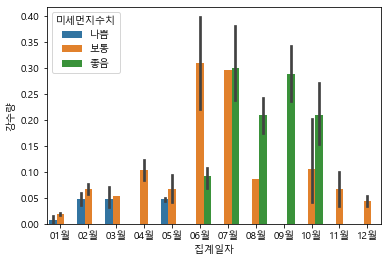

In [47]:
sns.barplot(data=traffic,x='집계일자',y='강수량',hue='미세먼지수치')

<AxesSubplot:xlabel='집계일자', ylabel='강수량'>

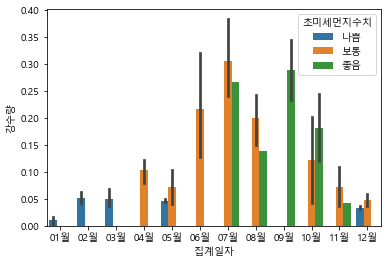

In [48]:
sns.barplot(data=traffic,x='집계일자',y='강수량',hue='초미세먼지수치')

<AxesSubplot:xlabel='집계일자', ylabel='기온'>

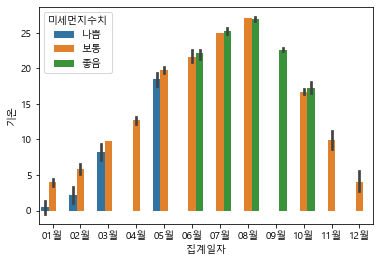

In [49]:
sns.barplot(data=traffic,x='집계일자',y='기온',hue='미세먼지수치')

<AxesSubplot:xlabel='집계일자', ylabel='기온'>

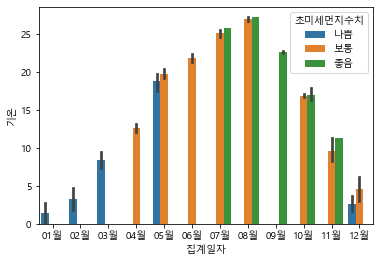

In [50]:
sns.barplot(data=traffic,x='집계일자',y='기온',hue='초미세먼지수치')

<AxesSubplot:xlabel='집계일자', ylabel='습도'>

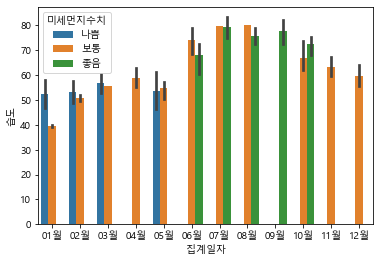

In [51]:
sns.barplot(data=traffic,x='집계일자',y='습도',hue='미세먼지수치')

<AxesSubplot:xlabel='집계일자', ylabel='습도'>

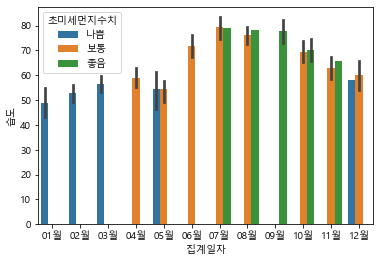

In [52]:
sns.barplot(data=traffic,x='집계일자',y='습도',hue='초미세먼지수치')

In [53]:
wind = pd.read_csv("풍향,풍속.csv",encoding='CP949')
wind['풍향'] = np.where(wind['풍향(16방위)'] < 45,'북풍',np.where(wind['풍향(16방위)'] < 90,'북동풍',np.where(wind['풍향(16방위)'] < 135,'동풍',np.where(wind['풍향(16방위)'] < 180,'남동풍',np.where(wind['풍향(16방위)'] < 225,'남풍',np.where(wind['풍향(16방위)'] < 270,'남서풍',np.where(wind['풍향(16방위)'] < 315,'서풍','북서풍')))))))
# 풍향(16방위)데이터를 가지고 풍향(8방위) ex) 북풍, 서풍, 북서풍 등으로 나눔
wind.drop('지점',axis=1,inplace=True)
wind

,지점명,일시,풍속(m/s),풍향(16방위),풍향
0,백령도,2019-01-01 01:00,5.5,320,북서풍
1,백령도,2019-01-01 02:00,6.3,320,북서풍
2,백령도,2019-01-01 03:00,6.1,320,북서풍
3,백령도,2019-01-01 04:00,7.2,320,북서풍
4,백령도,2019-01-01 05:00,5.2,320,북서풍
...,...,...,...,...,...
26182,강화,2019-12-30 20:00,5.6,250,남서풍
26183,강화,2019-12-30 21:00,5.7,250,남서풍
26184,강화,2019-12-30 22:00,4.9,230,남서풍
26185,강화,2019-12-30 23:00,4.2,200,남풍


In [54]:
wind['일시']=wind['일시'].str.split('-').str[1]
wind
#일시를 편하게 보기위해 바꿈

,지점명,일시,풍속(m/s),풍향(16방위),풍향
0,백령도,01,5.5,320,북서풍
1,백령도,01,6.3,320,북서풍
2,백령도,01,6.1,320,북서풍
3,백령도,01,7.2,320,북서풍
4,백령도,01,5.2,320,북서풍
...,...,...,...,...,...
26182,강화,12,5.6,250,남서풍
26183,강화,12,5.7,250,남서풍
26184,강화,12,4.9,230,남서풍
26185,강화,12,4.2,200,남풍


In [55]:
winter = wind.query('(일시 =="01") or (일시 =="02")or (일시 =="03")or (일시 =="12") ')
winter
# 미세먼지 계절관리제를 시행하는 달만 winter에 저장

,지점명,일시,풍속(m/s),풍향(16방위),풍향
0,백령도,01,5.5,320,북서풍
1,백령도,01,6.3,320,북서풍
2,백령도,01,6.1,320,북서풍
3,백령도,01,7.2,320,북서풍
4,백령도,01,5.2,320,북서풍
...,...,...,...,...,...
26182,강화,12,5.6,250,남서풍
26183,강화,12,5.7,250,남서풍
26184,강화,12,4.9,230,남서풍
26185,강화,12,4.2,200,남풍


In [56]:
winter['풍향'].value_counts() 
# 1,2,3,12 월에 풍향 빈도수 서풍종류가 많은것을 볼수있음

북서풍    3170
남서풍    1299
서풍     1083
북풍     1023
남풍      604
남동풍     559
동풍      468
북동풍     429
Name: 풍향, dtype: int64

In [57]:
wind = wind.groupby('일시').mean()
wind['지점'] = '인천'
wind['풍향'] = np.where(wind['풍향(16방위)'] < 45,'북풍',np.where(wind['풍향(16방위)'] < 90,'북동풍',np.where(wind['풍향(16방위)'] < 135,'동풍',np.where(wind['풍향(16방위)'] < 180,'남동풍',np.where(wind['풍향(16방위)'] < 225,'남풍',np.where(wind['풍향(16방위)'] < 270,'남서풍',np.where(wind['풍향(16방위)'] < 315,'서풍','북서풍')))))))
wind

,풍속(m/s),풍향(16방위),지점,풍향
일시,,,,
01,3.356438,239.578286,인천,남서풍
02,3.241171,241.254960,인천,남서풍
03,3.487769,229.973118,인천,남서풍
04,2.959500,212.006487,인천,남풍
05,3.155869,215.698925,인천,남풍
06,2.540926,206.694444,인천,남풍
07,2.735791,181.771583,인천,남풍
08,2.360556,200.080681,인천,남풍
09,2.558287,176.171296,인천,남동풍


In [74]:
a = traffic[traffic['도시별']=='인천']

<AxesSubplot:xlabel='집계일자', ylabel='초미세먼지'>

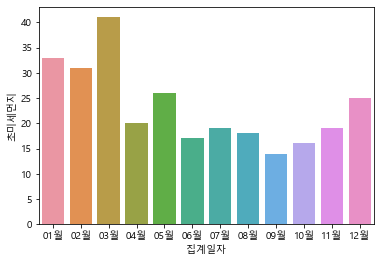

In [75]:
sns.barplot(data=a,x='집계일자',y='초미세먼지')